In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('Research.csv')

# Convert the timestamp column to a numeric type
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.to_pydatetime()

# print(df['timestamp'])  # this issue with above is you will get results like 2023-03-23 06:00:00.227.
# So you want to shorten it, so you will do the below steps.

# Extract the GB and timestamp columns as separate arrays
X = df['timestamp'].dropna().apply(lambda x: x.timestamp()).values.reshape(-1, 1)
#X = df['timestamp'].dropna().apply(lambda x: x.strftime('%Y-%m-%d')).values.reshape(-1, 1)
# print(X)
# you use this only if you just want to see how it looks like as a string and see readable format. But this version won't
# be able to fit into the model since it's needs float and not string.

y = df['GB'].dropna().values.reshape(-1, 1)



# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict future GB values based on future timestamps
future_timestamps = [['2023-03-24'], ['2023-03-25'], ['2023-03-26']]  # Replace with your desired dates
future_timestamps_numeric = [datetime.strptime(x[0], '%Y-%m-%d').timestamp() for x in future_timestamps]
future_GB = model.predict([[x] for x in future_timestamps_numeric])

# Print the predicted future GB values
print(future_GB)


[[59660.25542314]
 [59686.80579899]
 [59713.35617484]]


C:\Users\iluvs\AppData\Local\Temp\ipykernel_25268\485867016.py:9: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.to_pydatetime()


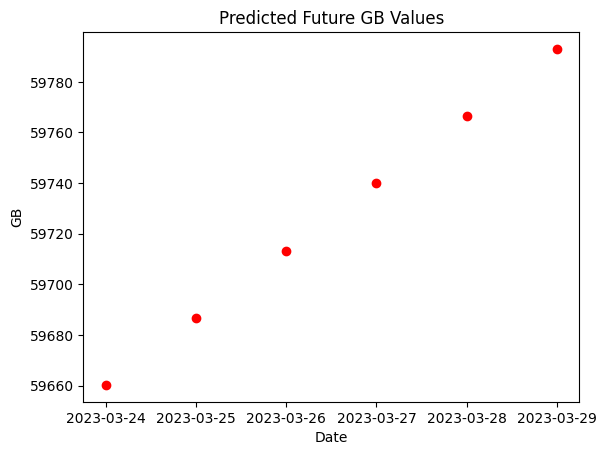

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('Research.csv')

# Convert the timestamp column to a numeric type
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.to_pydatetime()

# Extract the GB and timestamp columns as separate arrays
X = df['timestamp'].dropna().apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = df['GB'].dropna().values.reshape(-1, 1)

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict future GB values based on future timestamps
future_timestamps = [['2023-03-24'], ['2023-03-25'], ['2023-03-26'], ['2023-03-27'], ['2023-03-28'], ['2023-03-29']]  # Replace with your desired dates
future_timestamps_numeric = [datetime.strptime(x[0], '%Y-%m-%d').timestamp() for x in future_timestamps]
future_GB = model.predict([[x] for x in future_timestamps_numeric])

# Create a dictionary to store the predicted future GB values
future_data = {}
for i in range(len(future_timestamps)):
    future_data[future_timestamps[i][0]] = future_GB[i][0]

# Plot the predicted future GB values
plt.plot(list(future_data.keys()), list(future_data.values()), 'ro')
plt.xlabel('Date')
plt.ylabel('GB')
plt.title('Predicted Future GB Values')
plt.show()


[[60478.89201187]
 [61301.95366324]
 [62151.56569046]]


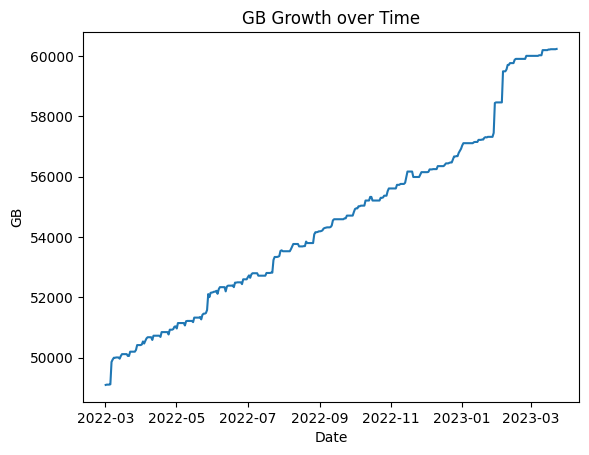

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('Research.csv')

# Convert the timestamp column to a numeric type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the GB and timestamp columns as separate arrays
X = df['timestamp'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = df['GB'].values.reshape(-1, 1)

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict future GB values based on future timestamps
future_timestamps = [['2023-4-24'], ['2023-5-25'], ['2023-6-26'], ]  # Replace with your desired dates
future_timestamps_numeric = [pd.to_datetime(x[0]).timestamp() for x in future_timestamps]
future_GB = model.predict([[x] for x in future_timestamps_numeric])

# Print the predicted future GB values
print(future_GB)

# Convert timestamp back to datetime for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Plot the data as a connected line graph
plt.plot(df['timestamp'], df['GB'], linestyle='-')
plt.title('GB Growth over Time')
plt.xlabel('Date')
plt.ylabel('GB')
plt.show()


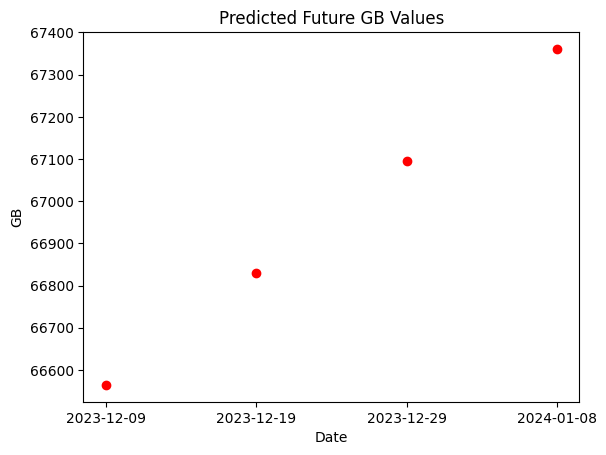

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('Research.csv')

# Convert the timestamp column to a numeric type
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.to_pydatetime()

# Extract the GB and timestamp columns as separate arrays
X = df['timestamp'].dropna().apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = df['GB'].dropna().values.reshape(-1, 1)

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict future GB values based on future timestamps
future_timestamps = []
for i in range(30, 61, 10):  #from 30 days to 60 days in 10 days increments.  So this will do a span of 2 months
    future_timestamps.append([datetime.now() + timedelta(days=i)])

future_timestamps_numeric = [datetime.strptime(x[0].strftime('%Y-%m-%d'), '%Y-%m-%d').timestamp() for x in future_timestamps]
future_GB = model.predict([[x] for x in future_timestamps_numeric])

# Create a dictionary to store the predicted future GB values
future_data = {}
for i in range(len(future_timestamps)):
    future_data[future_timestamps[i][0].strftime('%Y-%m-%d')] = future_GB[i][0]

# Plot the predicted future GB values
# fig, ax = plt.subplots(figsize=(12, 6))  # this will expand the chart size
plt.plot(list(future_data.keys()), list(future_data.values()), 'ro')
plt.xlabel('Date')
plt.ylabel('GB')
plt.title('Predicted Future GB Values')
plt.show()


[[66576.86685653]
 [66842.37061504]
 [67107.87437355]
 [67373.37813205]
 [67638.88189056]
 [67904.38564907]
 [68169.88940757]]


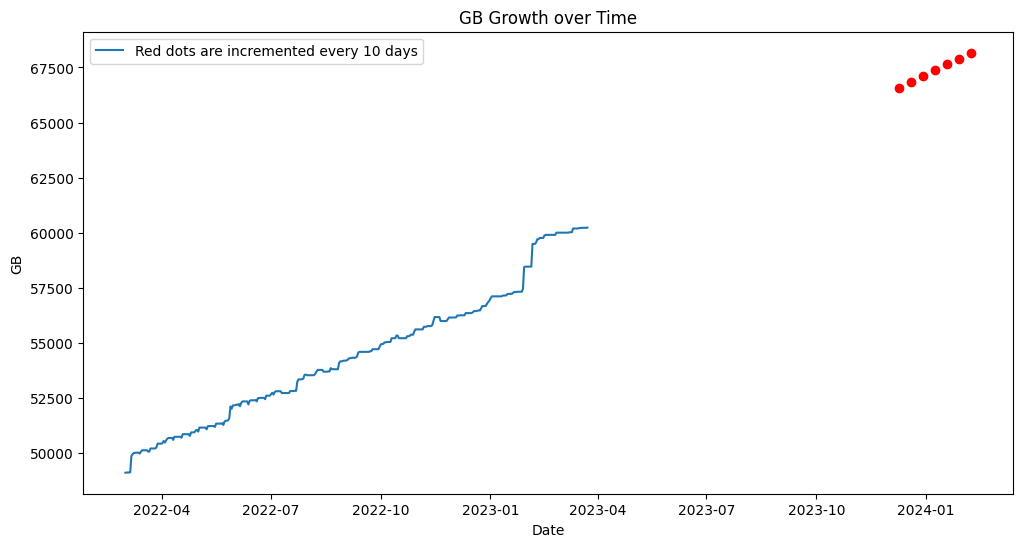

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import numpy as np

# Read the CSV file into a Pandas dataframe
df = pd.read_csv('Research.csv')

# Convert the timestamp column to a numeric type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the GB and timestamp columns as separate arrays
X = df['timestamp'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
y = df['GB'].values.reshape(-1, 1)

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict future GB values based on future timestamps
future_timestamps = []
for i in range(30, 92, 10):  #from 30 days to 91 days in 10 days increments.  So this will do a span of 3 months
    future_timestamps.append(datetime.now() + timedelta(days=i))

future_timestamps_numeric = [x.timestamp() for x in future_timestamps]
future_GB = model.predict([[x] for x in future_timestamps_numeric])

# Print the predicted future GB values
print(future_GB)

# Convert timestamp back to datetime for plotting
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Plot the data as a connected line graph
fig, ax = plt.subplots(figsize=(12, 6))  # this control chart size
plt.plot(df['timestamp'], df['GB'], linestyle='-')
plt.plot(future_timestamps, future_GB, 'ro')
plt.title('GB Growth over Time')
plt.xlabel('Date')
plt.ylabel('GB')
plt.legend(['Red dots are incremented every 10 days'])
plt.show()
